In [1]:
import os
import json

import swat
import pandas as pd

from graphviz import Digraph

In [2]:
colNames = ["employee_id", "manager_id"]
links = [
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 1),
    (6, 2),
    (7, 2),
    (8, 2),
    (9, 2),
    (10, 3),
    (11, 3),
    (12, 3),
    (13, 3),
    (14, 4),
    (15, 4),
    (16, 7),
    (17, 7),
    (18, 8),
    (19, 8),
    (20, 8),
]
dfLinkSetIn = pd.DataFrame(links, columns=colNames)

In [3]:
nodes = {
        1: "Michael North",
        2: "Megan Berry",
        3: "Sarah Berry",
        4: "Zoe Black",
        5: "Tim James",
        6: "Bella Tucker",
        7: "Ryan Metcalfe",
        8: "Max Mills",
        9: "Benjamin Glover",
        10: "Carolyn Henderson",
        11: "Nicola Kelly",
        12: "Alexandra Climo",
        13: "Dominic King",
        14: "Leonard Gray",
        15: "Eric Rampling",
        16: "Piers Paige",
        17: "Ryan Henderson",
        18: "Frank Tucker",
        19: "Nathan Ferguson",
        20: "Kevin Rampling",
    }

In [4]:
nodeSubsetList = [{'node': 2, 'reach': 1}]
dfNodeSubsetIn = pd.DataFrame(nodeSubsetList)

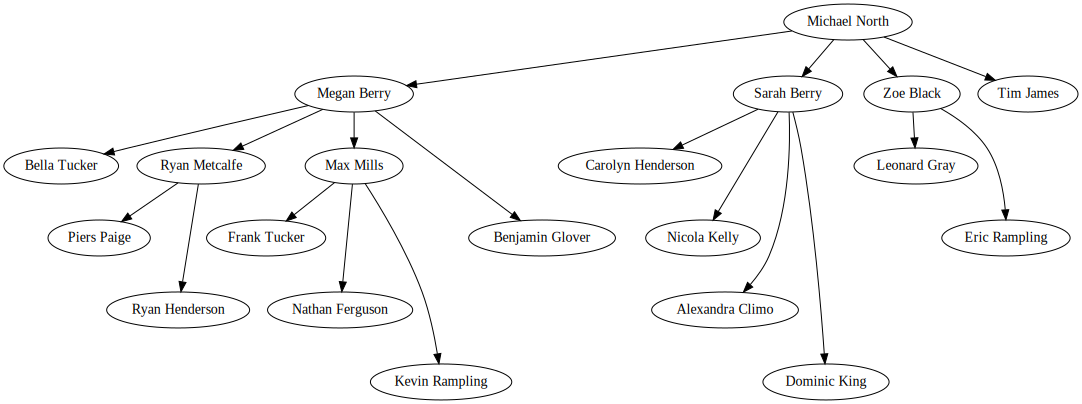

In [5]:
dot = Digraph()

for k,v in nodes.items():
    dot.node(str(k), v)

for item in links:
    dot.edge(str(item[1]), str(item[0]))

u = dot.unflatten(stagger=4)
u

In [12]:
print(u)

digraph {
	1	[label="Michael North"];
	2	[label="Megan Berry"];
	1 -> 2;
	3	[label="Sarah Berry"];
	1 -> 3;
	4	[label="Zoe Black"];
	1 -> 4;
	5	[label="Tim James"];
	1 -> 5	[minlen=1];
	6	[label="Bella Tucker"];
	2 -> 6	[minlen=1];
	7	[label="Ryan Metcalfe"];
	2 -> 7;
	8	[label="Max Mills"];
	2 -> 8;
	9	[label="Benjamin Glover"];
	2 -> 9	[minlen=2];
	10	[label="Carolyn Henderson"];
	3 -> 10	[minlen=1];
	11	[label="Nicola Kelly"];
	3 -> 11	[minlen=2];
	12	[label="Alexandra Climo"];
	3 -> 12	[minlen=3];
	13	[label="Dominic King"];
	3 -> 13	[minlen=4];
	14	[label="Leonard Gray"];
	4 -> 14	[minlen=1];
	15	[label="Eric Rampling"];
	4 -> 15	[minlen=2];
	16	[label="Piers Paige"];
	7 -> 16	[minlen=1];
	17	[label="Ryan Henderson"];
	7 -> 17	[minlen=2];
	18	[label="Frank Tucker"];
	8 -> 18	[minlen=1];
	19	[label="Nathan Ferguson"];
	8 -> 19	[minlen=2];
	20	[label="Kevin Rampling"];
	8 -> 20	[minlen=3];
}



In [13]:
host = os.environ['CAS_HOST_ORGRD']
port = int(os.environ['CAS_PORT'])
print(f"{host}:{port}")

orgrd061.unx.sas.com:23404


In [14]:
# Connect to the server
conn = swat.CAS(host, port)

# Load the actionsets we need
conn.loadactionset('network')

NOTE: Added action set 'network'.


[actionset]

 'network'

+ Elapsed: 0.0741s, user: 0.116s, sys: 0.032s, mem: 6.3mb

In [15]:
conn.upload(dfLinkSetIn, casout=dict(name='LinkSetIn'))
conn.upload(dfNodeSubsetIn, casout=dict(name='NodeSubsetIn'))

NOTE: Cloud Analytic Services made the uploaded file available as table LINKSETIN in caslib CASUSERHDFS(daherr).
NOTE: The table LINKSETIN has been created in caslib CASUSERHDFS(daherr) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services made the uploaded file available as table NODESUBSETIN in caslib CASUSERHDFS(daherr).
NOTE: The table NODESUBSETIN has been created in caslib CASUSERHDFS(daherr) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSERHDFS(daherr)'

[tableName]

 'NODESUBSETIN'

[casTable]

 CASTable('NODESUBSETIN', caslib='CASUSERHDFS(daherr)')

+ Elapsed: 0.0318s, user: 0.045s, sys: 0.059s, mem: 86.4mb

In [16]:
conn.network.reach(
    direction     = "directed",
    links         = {"name":"LinkSetIn"},
    linksvar      = {'from': 'manager_id', 'to': 'employee_id'},
    nodessubset   = {"name":"NodeSubSetIn"},
    outReachNodes = {"name":"ReachNodes",  "replace":True},
    outReachLinks = {"name":"ReachLinks",  "replace":True},
    outCounts     = {"name":"ReachCounts", "replace":True},
    maxreach      = 2)

NOTE: The number of nodes in the input graph is 20.
NOTE: The number of links in the input graph is 19.
NOTE: Processing reach networks using 80 threads across 5 machines.
NOTE: Processing reach networks for 1 source networks.
NOTE: Processing reach networks used 0.00 (cpu: 0.00) seconds.


[OutputCasTables]

                 casLib         Name Label  Rows  Columns                                           casTable
 0  CASUSERHDFS(daherr)   ReachLinks           9        3  CASTable('ReachLinks', caslib='CASUSERHDFS(dah...
 1  CASUSERHDFS(daherr)   ReachNodes          10        2  CASTable('ReachNodes', caslib='CASUSERHDFS(dah...
 2  CASUSERHDFS(daherr)  ReachCounts           1        4  CASTable('ReachCounts', caslib='CASUSERHDFS(da...

[ProblemSummary]

 Problem Summary
 
             Name1           Label1       cValue1  nValue1
 0        numNodes  Number of Nodes            20     20.0
 1        numLinks  Number of Links            19     19.0
 2  graphDirection  Graph Direction      Directed      NaN

[SolutionSummary]

 Solution Summary
 
          Name1           Label1       cValue1   nValue1
 0  problemType     Problem Type         Reach       NaN
 1       status  Solution Status            OK       NaN
 2      cpuTime         CPU Time          0.00  0.000000
 3     realTime        Real Time          0.00  0.001624

[solutionStatus]

 'OK'

[solutionStatusCode]

 0

+ Elapsed: 0.0758s, user: 0.099s, sys: 0.175s, mem: 315mb

In [17]:
conn.fetch('ReachLinks')

,reach,manager_id,employee_id
0,1.0,2.0,6.0
1,1.0,2.0,7.0
2,1.0,2.0,8.0
3,1.0,2.0,9.0
4,1.0,7.0,16.0
5,1.0,7.0,17.0
6,1.0,8.0,18.0
7,1.0,8.0,19.0
8,1.0,8.0,20.0


In [18]:
conn.fetch('ReachNodes')

,reach,node
0,1.0,2.0
1,1.0,6.0
2,1.0,7.0
3,1.0,8.0
4,1.0,9.0
5,1.0,16.0
6,1.0,17.0
7,1.0,18.0
8,1.0,19.0
9,1.0,20.0


In [19]:
conn.fetch('ReachCounts')

,reach,node,count,count_not
0,1.0,2.0,10.0,10.0


In [33]:
report_list = [int(i) for i in  conn.fetch('ReachNodes')['Fetch']['node'].to_list() ]

In [34]:
report_list

[2, 6, 7, 8, 9, 16, 17, 18, 19, 20]

In [39]:
report_nodes = {k:v for (k,v) in nodes.items() if k in report_list}

In [40]:
report_nodes

{2: 'Megan Berry',
 6: 'Bella Tucker',
 7: 'Ryan Metcalfe',
 8: 'Max Mills',
 9: 'Benjamin Glover',
 16: 'Piers Paige',
 17: 'Ryan Henderson',
 18: 'Frank Tucker',
 19: 'Nathan Ferguson',
 20: 'Kevin Rampling'}

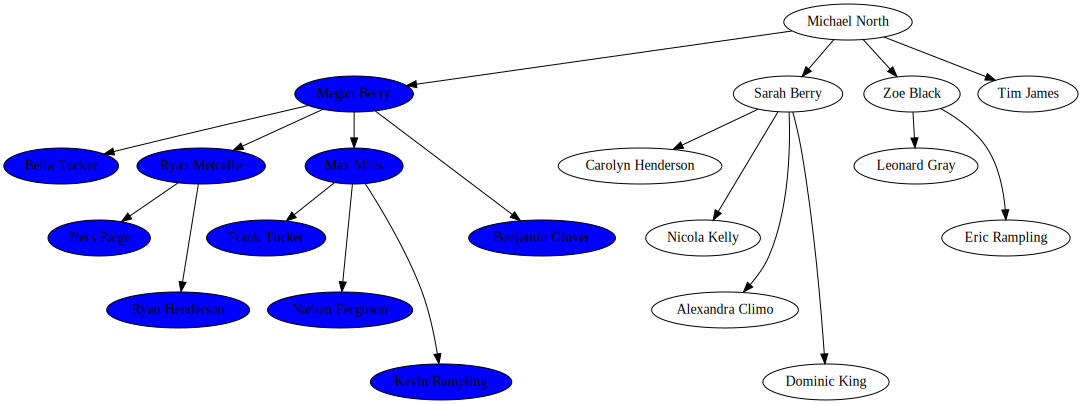

In [38]:
dot_2 = Digraph()

for k,v in nodes.items():
    if k in report_list:
        dot_2.node(str(k), v, style='filled', fillcolor='blue')
    else:
        dot_2.node(str(k), v)

for item in links:
    dot_2.edge(str(item[1]), str(item[0]))

u_2 = dot_2.unflatten(stagger=4)
u_2